In [99]:
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
import seaborn as sns

In [101]:
from feature_selector import FeatureSelector

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
train = pd.read_csv('RECS_COMBINED_DATA.csv')
train_labels = train['TOTALDOLLAR']
train.head()

,RECSYEAR,DOEID,REGIONC,DIVISION,TYPEHUQ,CELLAR,STORIES,PRKGPLC1,YEARMADE,OCCUPYY,...,WDPELLET,WDOTHER,WDWARM,WDWATER,USESOLAR,SOLWATER,SOLOTHER,TVAUDIOEQUIP,PCOFFEQUIP,PHONE
0,2001,1001,1,1,2,1,31,1,9,9,...,9,0,0,0,0,0,0,8,2,3
1,2001,1002,3,7,2,0,10,1,7,9,...,9,0,0,0,0,0,0,7,2,3
2,2001,1003,4,9,2,0,20,1,4,1,...,9,0,0,0,0,0,0,9,0,3
3,2001,1004,1,1,2,1,31,1,1,2,...,0,0,1,0,0,0,0,12,6,3
4,2001,1005,4,9,2,0,10,1,3,9,...,9,0,0,0,0,0,0,6,2,3


In [104]:
train = train.drop(columns = ['RECSYEAR','DOEID'])

In [105]:
train = train.drop(columns = ['PERIODFO','PERIODLP','PERIODEL','PERIODNG','NWEIGHT'])

In [66]:
#train=train.drop(columns=["ZTYPEHUQ","ZCELLAR","ZBASEFIN","ZATTIC","ZATTICFIN","ZSTORIES","ZPRKGPLC1","ZSIZEOFGARAGE","ZKOWNRENT","ZYEARMADERANGE","ZOCCUPYYRANGE","ZSTUDIO","ZBEDROOMS","ZNCOMBATH","ZNHAFBATH","ZOTHROOMS","ZTOTROOMS","ZWALLTYPE","ZROOFTYPE","ZHIGHCEIL","ZDOOR1SUM","ZWINDOWS","ZTYPEGLASS","ZWINFRAME","ZADQINSUL","ZDRAFTY","ZUGASHERE","ZSWIMPOOL","ZMONPOOL","ZPOOL","ZFUELPOOL","ZRECBATH","ZMONTUB","ZFUELTUB","ZOUTLET","ZALTFUELPEV","ZBACKUP","ZNUMFRIG","ZSIZRFRI1","ZTYPERFR1","ZAGERFRI1","ZICE","ZSIZRFRI2","ZTYPERFR2","ZAGERFRI2","ZLOCRFRI2","ZNUMFREEZ","ZUPRTFRZR","ZSIZFREEZ","ZAGEFRZR","ZSTOVEN","ZSTOVENFUEL","ZDUALCOOKTFUEL","ZDUALOVENFUEL","ZCOOKTUSE","ZOVENUSE","ZSTOVE","ZSTOVEFUEL","ZSEPCOOKTUSE","ZOVEN","ZOVENFUEL","ZSEPOVENUSE","ZMICRO","ZAMTMICRO","ZOUTGRILL","ZOUTGRILLFUEL","ZNUMMEAL","ZTOAST","ZTOASTOVN","ZCOFFEE","ZCROCKPOT","ZFOODPROC","ZRICECOOK","ZBLENDER","ZAPPOTHER","ZDISHWASH","ZDWASHUSE","ZDWCYCLE","ZAGEDW","ZCWASHER","ZTOPFRONT","ZWASHLOAD","ZWASHTEMP","ZRNSETEMP","ZAGECWASH","ZDRYER","ZDRYRFUEL","ZDRYRUSE","ZAGECDRYER","ZTVCOLOR","ZTVSIZE1","ZTVTYPE1","ZTVONWD1","ZTVONWE1","ZTVSIZE2","ZTVTYPE2","ZTVONWD2","ZTVONWE2","ZCABLESAT","ZCOMBODVR","ZSEPDVR","ZPLAYSTA","ZDVD","ZVCR","ZINTSTREAM","ZTVAUDIOSYS","ZDESKTOP","ZNUMLAPTOP","ZNUMTABLET","ZELPERIPH","ZNUMSMPHONE","ZCELLPHONE","ZINTERNET","ZINWIRELESS","ZHEATHOME","ZDNTHEAT","ZEQUIPM","ZFUELHEAT","ZEQUIPAGE","ZTHERMAIN","ZPROTHERM","ZEQUIPMUSE","ZTEMPHOME","ZTEMPGONE","ZTEMPNITE","ZEQUIPAUX","ZEQUIPAUXTYPE","ZFUELAUX","ZBASEHEAT","ZATTCHEAT","ZGARGHEAT","ZMOISTURE","ZUSEMOISTURE","ZAIRCOND","ZCOOLTYPE","ZCENACHP","ZAGECENAC","ZTHERMAINAC","ZPROTHERMAC","ZUSECENAC","ZNUMBERAC","ZWWACAGE","ZUSEWWAC","ZTEMPHOMEAC","ZTEMPGONEAC","ZTEMPNITEAC","ZBASECOOL","ZATTCCOOL","ZGARGCOOL","ZSWAMPCOL","ZNUMCFAN","ZNUMFLOORFAN","ZNUMWHOLEFAN","ZNUMATTICFAN","ZNOTMOIST","ZUSENOTMOIST","ZFUELH2O","ZH2OHEATAPT","ZWHEATAGE","ZWHEATSIZ","ZMORETHAN1H2O","ZFUELH2O2","ZLGTINNUM","ZLGTIN4","ZLGTINCAN","ZLGTINCFL","ZLGTINLED","ZLGTINCNTL","ZLGTOUTNUM","ZLGTOUTCNTL","ZELPAY","ZNGPAY","ZLPGPAY","ZFOPAY","ZHHSEX","ZHHAGE","ZEMPLOYHH","ZSDESCENT","ZHOUSEHOLDER_RACE","ZEDUCATION","ZNHSLDMEM","ZNUMADULT","ZNUMCHILD","ZATHOME","ZMONEYPY","ZENERGYASST","ZENERGYASST11","ZENERGYASST12","ZENERGYASST13","ZENERGYASST14","ZENERGYASST15","ZENERGYASSTOTH","ZSCALEB","ZSCALEG","ZSCALEE","ZPAYHELP","ZNOHEATBROKE","ZNOHEATEL","ZNOHEATNG","ZNOHEATBULK","ZNOHEATDAYS","ZNOHEATHELP","ZCOLDMA","ZNOACBROKE","ZNOACEL","ZNOACDAYS","ZNOACHELP","ZHOTMA","ZWOODLOGS","ZWDPELLET","ZTOTSQFT_EN","ZWOODAMT","ZPELLETAMT","ZELAMOUNT","ZNGAMOUNT","ZFOAMOUNT","ZLPAMOUNT"])

In [89]:
train_bk=train
#train=train.drop(columns=['DOEID','METROMICRO','UATYP10','CLIMATE_REGION_PUB','IECC_CLIMATE_PUB','NGXBTU'])

In [14]:
train.dtypes

REGIONC         int64
DIVISION        int64
TYPEHUQ         int64
CELLAR          int64
STORIES         int64
PRKGPLC1        int64
YEARMADE        int64
OCCUPYY         int64
BEDROOMS        int64
NCOMBATH        int64
NHAFBATH        int64
OTHROOMS        int64
TOTROOMS        int64
DOOR1SUM        int64
WINDOWS         int64
ADQINSUL        int64
DRAFTY          int64
UGASHERE        int64
FUELPOOL        int64
SIZRFRI1        int64
TYPERFR1        int64
AGERFRI1        int64
ICE             int64
SIZRFRI2        int64
TYPERFR2        int64
AGERFRI2        int64
NUMFREEZ        int64
SIZFREEZ        int64
AGEFRZR         int64
STOVENFUEL      int64
                ...  
AIRCOND         int64
CENACHP         int64
USEEL           int64
ELWARM          int64
ELCOOL          int64
ELFOOD          int64
ELOTHER         int64
UGWARM          int64
UGWATER         int64
UGCOOK          int64
UGOTH           int64
USELP           int64
LPWARM          int64
LPWATER         int64
LPCOOK    

In [17]:
for col in train :
        if (train[col].dtype == 'object'): # for object type
            print(col)

PERIODFO
PERIODLP
PERIODEL
PERIODNG


In [19]:
train_scaler = pd.DataFrame(StandardScaler().fit_transform(train.values), columns=train.columns, index=train.index)

In [20]:
train_labels_scaler = StandardScaler().fit_transform(train_labels.values.reshape(-1,1))

In [106]:
fs = FeatureSelector(data = train, labels = train_labels)

In [ ]:
# fs.identify_all(selection_params = {'missing_threshold': 0.6, 'correlation_threshold': 0.98, 
#                                     'task': 'classification', 'eval_metric': 'auc', 
#                                      'cumulative_importance': 0.99})

In [107]:
fs.identify_missing(missing_threshold=0.6)

0 features with greater than 0.60 missing values.



In [108]:
fs.identify_single_unique()

0 features with a single unique value.



In [109]:
single_unique = fs.ops['single_unique']
single_unique

[]

In [110]:

fs.unique_stats.sample(5)

,nunique
STORIES,8
PIPELESS,3
TOTCSQFT,4249
FUELPOOL,8
RNSETEMP,5


In [111]:
fs.identify_collinear(correlation_threshold=0.98)

40 features with a correlation magnitude greater than 0.98.



In [112]:

correlated_features = fs.ops['collinear']
correlated_features[:5]

['STEAMR', 'CARRYKER', 'RANGE', 'LPGAUX', 'OTHERAUX']

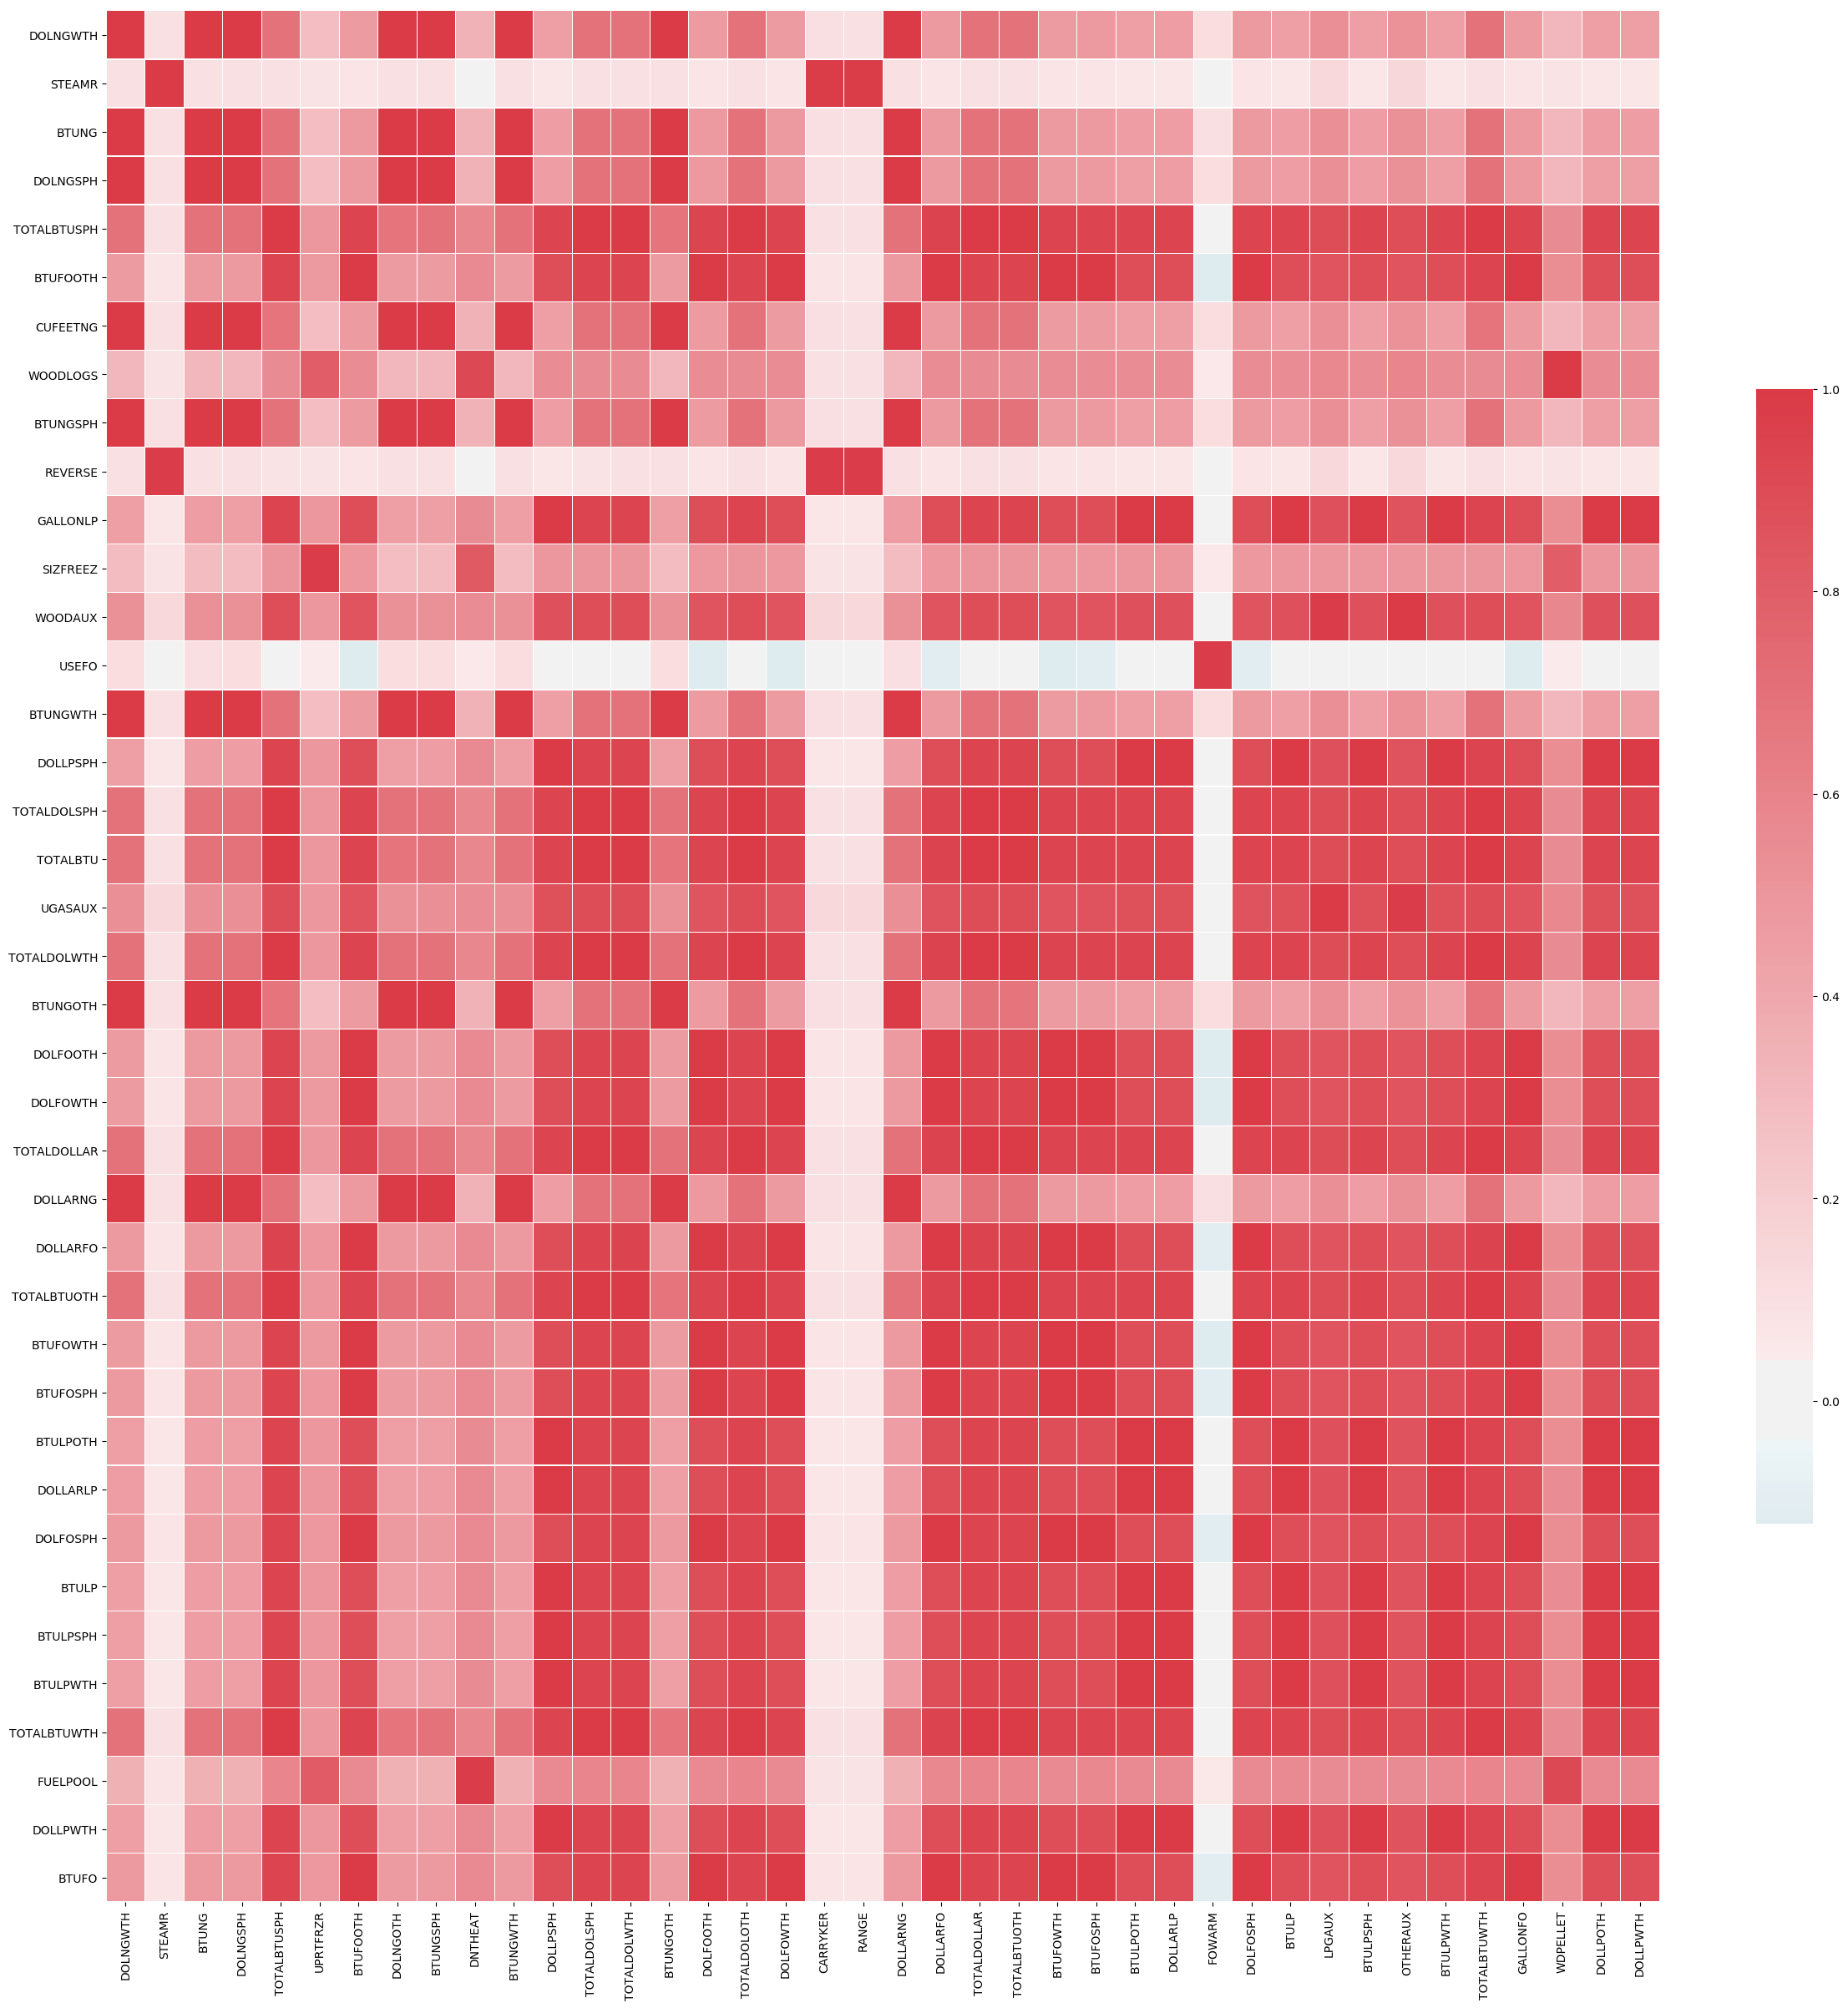

In [113]:
#corr_mat_plt= fs.corr_matrix
corr_mat_plt = fs.corr_matrix.loc[list(set(fs.record_collinear['corr_feature'])), 
	                                                list(set(fs.record_collinear['drop_feature']))]
f, ax = plt.subplots(figsize=(30,30))
        
        # Diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

        # Draw the heatmap with a color bar
sns.heatmap(corr_mat_plt, cmap=cmap, center=0,
                    linewidths=.25, cbar_kws={"shrink": 0.6})


In [114]:

fs.record_collinear

,drop_feature,corr_feature,corr_value
0,STEAMR,REVERSE,0.981232
1,CARRYKER,STEAMR,0.982914
2,RANGE,STEAMR,0.985521
3,LPGAUX,UGASAUX,0.995799
4,OTHERAUX,WOODAUX,0.995659
5,BTULP,GALLONLP,0.999991
6,BTULPSPH,GALLONLP,0.999995
7,BTULPSPH,BTULP,0.999998
8,BTULPWTH,GALLONLP,0.999999
9,BTULPWTH,BTULP,0.999991


In [115]:
fs.identify_zero_importance(task = 'regression', eval_metric = 'l2', 
                            n_iterations = 10, early_stopping = True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[298]	valid_0's l2: 3.87095e+06	valid_0's l2: 3.87095e+06
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[838]	valid_0's l2: 3.46851e+06	valid_0's l2: 3.46851e+06
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[986]	valid_0's l2: 1.79082e+07	valid_0's l2: 1.79082e+07
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[999]	valid_0's l2: 1.23541e+07	valid_0's l2: 1.23541e+07
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[999]	valid_0's l2: 7.02684e+06	valid_0's l2: 7.02684e+06
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[695]	valid_0's l2: 4.84561e+06	valid_0's l2: 4.8

In [117]:
one_hot_features = fs.one_hot_features
base_features = fs.base_features
print('There are %d original features' % len(base_features))
print('There are %d one-hot features' % len(one_hot_features))

There are 192 original features
There are 0 one-hot features


In [118]:

zero_importance_features = fs.ops['zero_importance']
zero_importance_features

['ELOTHER', 'SOLOTHER', 'USEEL']

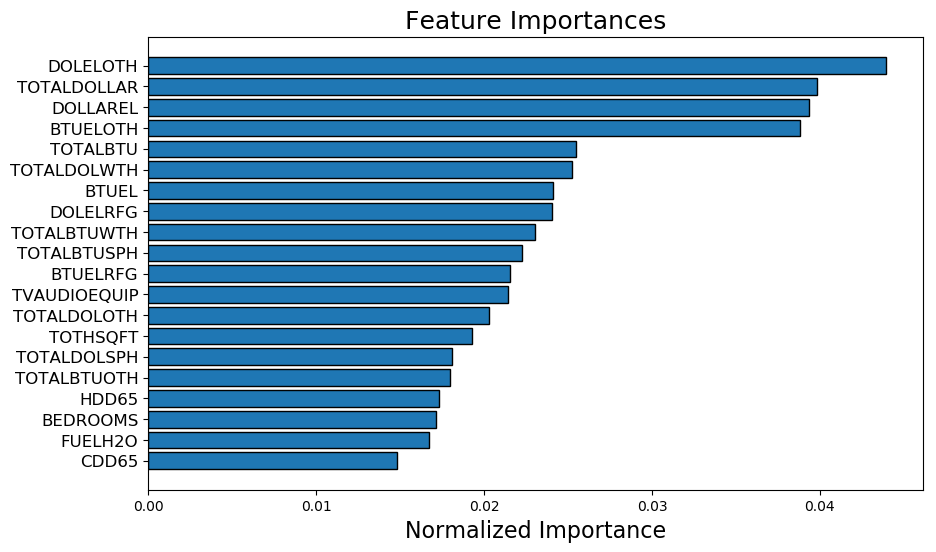

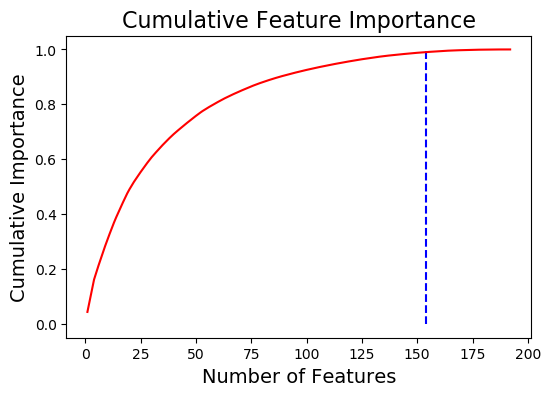

154 features required for 0.99 of cumulative importance


In [119]:

fs.plot_feature_importances(threshold = 0.99, plot_n = 20)

In [120]:
fs.feature_importances.count()

feature                  192
importance               192
normalized_importance    192
cumulative_importance    192
dtype: int64

In [121]:

top_features = list(fs.feature_importances.loc[:155, 'feature'])
len(top_features)

156

In [122]:
top_features

['DOLELOTH',
 'TOTALDOLLAR',
 'DOLLAREL',
 'BTUELOTH',
 'TOTALBTU',
 'TOTALDOLWTH',
 'BTUEL',
 'DOLELRFG',
 'TOTALBTUWTH',
 'TOTALBTUSPH',
 'BTUELRFG',
 'TVAUDIOEQUIP',
 'TOTALDOLOTH',
 'TOTHSQFT',
 'TOTALDOLSPH',
 'TOTALBTUOTH',
 'HDD65',
 'BEDROOMS',
 'FUELH2O',
 'CDD65',
 'DOLELCOL',
 'TOTUSQFT',
 'TOTCSQFT',
 'TOTROOMS',
 'HHAGE',
 'WHEATSIZ',
 'CUFEETNG',
 'DOLELWTH',
 'PCOFFEQUIP',
 'WINDOWS',
 'BTUNGWTH',
 'NCOMBATH',
 'BTUELWTH',
 'BTUELCOL',
 'YEARMADE',
 'DOLNGWTH',
 'FUELHEAT',
 'MONEYPY',
 'DOLLARNG',
 'TEMPGONE',
 'LGTOUTNUM',
 'BTUNGOTH',
 'EQUIPM',
 'BTUELSPH',
 'TEMPNITE',
 'NUMMEAL',
 'BTUNGSPH',
 'BTUFO',
 'NUMCFAN',
 'NHAFBATH',
 'TEMPHOME',
 'DOLNGOTH',
 'NUMBERAC',
 'NHSLDMEM',
 'DOLELSPH',
 'BTUNG',
 'BTUFOSPH',
 'WHEATAGE',
 'DOLNGSPH',
 'OTHROOMS',
 'GALLONLP',
 'DOLLARFO',
 'ESDISHW',
 'BTUFOWTH',
 'DOLLARLP',
 'ELECAUX',
 'SIZRFRI1',
 'AMTMICRO',
 'STOVENFUEL',
 'DOLFOSPH',
 'DWASHUSE',
 'DOLFOWTH',
 'OVENUSE',
 'DIVISION',
 'OCCUPYY',
 'HOUSEHOLDER_RACE',
 'E

In [123]:

fs.identify_low_importance(cumulative_importance = 0.95)

114 features required for cumulative importance of 0.95 after one hot encoding.
78 features do not contribute to cumulative importance of 0.95.



In [124]:
train_removed = fs.remove(methods = 'all')

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 106 features.


In [125]:
train_removed.columns

Index(['REGIONC', 'DIVISION', 'CELLAR', 'STORIES', 'PRKGPLC1', 'YEARMADE',
       'OCCUPYY', 'BEDROOMS', 'NCOMBATH', 'NHAFBATH', 'OTHROOMS', 'TOTROOMS',
       'WINDOWS', 'ADQINSUL', 'DRAFTY', 'FUELPOOL', 'SIZRFRI1', 'TYPERFR1',
       'AGERFRI1', 'SIZRFRI2', 'TYPERFR2', 'AGERFRI2', 'NUMFREEZ', 'SIZFREEZ',
       'AGEFRZR', 'STOVENFUEL', 'OVENUSE', 'AMTMICRO', 'NUMMEAL', 'DWASHUSE',
       'WASHLOAD', 'WASHTEMP', 'EQUIPM', 'FUELHEAT', 'EQUIPAGE', 'PROTHERM',
       'TEMPHOME', 'TEMPGONE', 'TEMPNITE', 'ELECAUX', 'AGECENAC', 'USECENAC',
       'NUMBERAC', 'WWACAGE', 'USEWWAC', 'NUMCFAN', 'FUELH2O', 'WHEATAGE',
       'WHEATSIZ', 'LGTOUTNUM', 'ESDISHW', 'PGASHEAT', 'HHSEX', 'HHAGE',
       'EMPLOYHH', 'HOUSEHOLDER_RACE', 'NHSLDMEM', 'MONEYPY', 'TOTCSQFT',
       'TOTHSQFT', 'TOTUSQFT', 'CDD65', 'HDD65', 'GALLONLP', 'CUFEETNG',
       'BTUEL', 'BTUELSPH', 'BTUELCOL', 'BTUELWTH', 'BTUELRFG', 'BTUELOTH',
       'BTUFO', 'DOLLAREL', 'DOLELSPH', 'DOLELCOL', 'DOLELWTH', 'DOLELRFG',
       'DOLE

In [126]:
train.columns

Index(['REGIONC', 'DIVISION', 'TYPEHUQ', 'CELLAR', 'STORIES', 'PRKGPLC1',
       'YEARMADE', 'OCCUPYY', 'BEDROOMS', 'NCOMBATH',
       ...
       'WDPELLET', 'WDOTHER', 'WDWARM', 'WDWATER', 'USESOLAR', 'SOLWATER',
       'SOLOTHER', 'TVAUDIOEQUIP', 'PCOFFEQUIP', 'PHONE'],
      dtype='object', length=192)

In [127]:
train_removed_all = fs.remove(methods = 'all', keep_one_hot=False)

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 106 features including one-hot features.


In [128]:
print('Original Number of Features', train.shape[1])
print('Final Number of Features: ', train_removed_all.shape[1])

Original Number of Features 192
Final Number of Features:  86


In [129]:
train_removed_all.to_csv('final_feature_selection_price.csv',index=False)